In [15]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader  as dataloader

from torchvision.datasets import MNIST
from torchvision import transforms

from tqdm.notebook import tqdm, trange

import numpy as np
import matplotlib.pyplot as plt


In [8]:
batch_size = 256
data_set_root = "dataset"

train = MNIST(data_set_root, train=True, download=True, transform=transforms.ToTensor())
test = MNIST(data_set_root, train=True, download=True, transform=transforms.ToTensor())

train_loader = dataloader.DataLoader(train, shuffle=True, batch_size=batch_size, num_workers=0, pin_memory=False)
test_loader = dataloader.DataLoader(train, shuffle=True, batch_size=batch_size, num_workers=0, pin_memory=False)




100%|██████████| 9.91M/9.91M [00:06<00:00, 1.49MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 775kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.67MB/s]


In [12]:
GPU_indx = 0
device = torch.device(GPU_indx if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [13]:
images, label = next(iter(train_loader))
images.shape

torch.Size([256, 1, 28, 28])

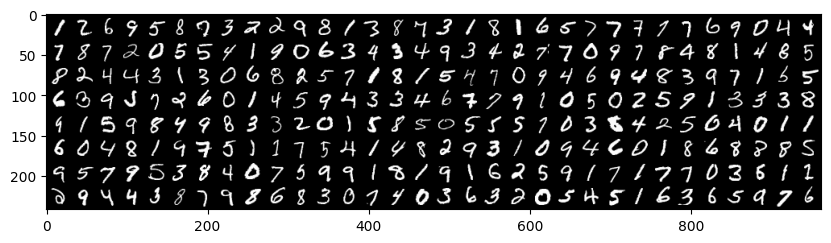

In [17]:
plt.figure(figsize=(10,5))
out = torchvision.utils.make_grid(images, 32)
plt.imshow(out.numpy().transpose((1,2,0)))

In [18]:
class Simple_MLP(nn.Module):
    def __init__(self, output_nos):
        super(Simple_MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, output_nos)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [24]:
simple_MLP = Simple_MLP(10).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(simple_MLP.parameters(), lr=1e-3)

In [30]:
def train_epoch(model, train_loader, loss_function, optimizer):
    loss_logger = []
    for (x_train, y_train) in tqdm(train_loader, desc="Training Epochs", leave=False):
        y_train_hat = model(x_train.to(device))
        loss = loss_function(y_train_hat, y_train.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_logger.append(loss.item())
    return model, optimizer, loss_logger

In [31]:
def test_epoch(model, test_loader, loss_function):
    accuracy_logger = []
    loss_logger = []
    for (x_test, y_test) in tqdm(test_loader, desc="Test Epochs", leave=False):
        y_test_hat = model(x_test.to(device))
        loss = loss_function(y_test_hat, y_test.to(device))
        loss_logger.append(loss)

        _,pred = torch.max(y_test_hat, 1)
        correct_pred = (pred == y_test.to(device)).sum().item() / y_test.shape[0]
        accuracy_logger.append(correct_pred * 100)
    return loss_logger, accuracy_logger

In [32]:
epochs = 5

for i in trange(epochs, desc="Overall Epochs", leave=False):
    simple_MLP, optimizer, loss_logger = train_epoch(model=simple_MLP, 
        train_loader=train_loader, loss_function=loss_function, optimizer=optimizer)
    loss_logger, accuracy_logger = test_epoch(model=simple_MLP, 
                                test_loader=test_loader,loss_function=loss_function)
    print(f"loss = {loss_logger[:-1]}", f"accuracy = {accuracy_logger[:-1]}")

Overall Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

Test Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

loss = [tensor(0.0477, grad_fn=<NllLossBackward0>), tensor(0.0619, grad_fn=<NllLossBackward0>), tensor(0.0516, grad_fn=<NllLossBackward0>), tensor(0.1035, grad_fn=<NllLossBackward0>), tensor(0.0233, grad_fn=<NllLossBackward0>), tensor(0.0644, grad_fn=<NllLossBackward0>), tensor(0.0522, grad_fn=<NllLossBackward0>), tensor(0.0843, grad_fn=<NllLossBackward0>), tensor(0.0668, grad_fn=<NllLossBackward0>), tensor(0.0543, grad_fn=<NllLossBackward0>), tensor(0.0700, grad_fn=<NllLossBackward0>), tensor(0.0650, grad_fn=<NllLossBackward0>), tensor(0.0662, grad_fn=<NllLossBackward0>), tensor(0.0490, grad_fn=<NllLossBackward0>), tensor(0.0557, grad_fn=<NllLossBackward0>), tensor(0.0827, grad_fn=<NllLossBackward0>), tensor(0.0679, grad_fn=<NllLossBackward0>), tensor(0.1090, grad_fn=<NllLossBackward0>), tensor(0.0818, grad_fn=<NllLossBackward0>), tensor(0.0321, grad_fn=<NllLossBackward0>), tensor(0.0571, grad_fn=<NllLossBackward0>), tensor(0.0796, grad_fn=<NllLossBackward0>), tensor(0.0827, grad_fn=<

Training Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

Test Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

loss = [tensor(0.0296, grad_fn=<NllLossBackward0>), tensor(0.0550, grad_fn=<NllLossBackward0>), tensor(0.0428, grad_fn=<NllLossBackward0>), tensor(0.0226, grad_fn=<NllLossBackward0>), tensor(0.0386, grad_fn=<NllLossBackward0>), tensor(0.0598, grad_fn=<NllLossBackward0>), tensor(0.1124, grad_fn=<NllLossBackward0>), tensor(0.0436, grad_fn=<NllLossBackward0>), tensor(0.0480, grad_fn=<NllLossBackward0>), tensor(0.0133, grad_fn=<NllLossBackward0>), tensor(0.0347, grad_fn=<NllLossBackward0>), tensor(0.0574, grad_fn=<NllLossBackward0>), tensor(0.0215, grad_fn=<NllLossBackward0>), tensor(0.0502, grad_fn=<NllLossBackward0>), tensor(0.0468, grad_fn=<NllLossBackward0>), tensor(0.0177, grad_fn=<NllLossBackward0>), tensor(0.0421, grad_fn=<NllLossBackward0>), tensor(0.0714, grad_fn=<NllLossBackward0>), tensor(0.0195, grad_fn=<NllLossBackward0>), tensor(0.0708, grad_fn=<NllLossBackward0>), tensor(0.0166, grad_fn=<NllLossBackward0>), tensor(0.0386, grad_fn=<NllLossBackward0>), tensor(0.0440, grad_fn=<

Training Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

Test Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

loss = [tensor(0.0381, grad_fn=<NllLossBackward0>), tensor(0.0286, grad_fn=<NllLossBackward0>), tensor(0.0520, grad_fn=<NllLossBackward0>), tensor(0.0370, grad_fn=<NllLossBackward0>), tensor(0.0254, grad_fn=<NllLossBackward0>), tensor(0.0408, grad_fn=<NllLossBackward0>), tensor(0.0221, grad_fn=<NllLossBackward0>), tensor(0.0217, grad_fn=<NllLossBackward0>), tensor(0.0363, grad_fn=<NllLossBackward0>), tensor(0.0104, grad_fn=<NllLossBackward0>), tensor(0.0196, grad_fn=<NllLossBackward0>), tensor(0.0351, grad_fn=<NllLossBackward0>), tensor(0.0240, grad_fn=<NllLossBackward0>), tensor(0.0442, grad_fn=<NllLossBackward0>), tensor(0.0085, grad_fn=<NllLossBackward0>), tensor(0.0412, grad_fn=<NllLossBackward0>), tensor(0.0272, grad_fn=<NllLossBackward0>), tensor(0.0122, grad_fn=<NllLossBackward0>), tensor(0.0166, grad_fn=<NllLossBackward0>), tensor(0.0566, grad_fn=<NllLossBackward0>), tensor(0.0331, grad_fn=<NllLossBackward0>), tensor(0.0364, grad_fn=<NllLossBackward0>), tensor(0.0499, grad_fn=<

Training Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

Test Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

loss = [tensor(0.0192, grad_fn=<NllLossBackward0>), tensor(0.0284, grad_fn=<NllLossBackward0>), tensor(0.0195, grad_fn=<NllLossBackward0>), tensor(0.0295, grad_fn=<NllLossBackward0>), tensor(0.0304, grad_fn=<NllLossBackward0>), tensor(0.0128, grad_fn=<NllLossBackward0>), tensor(0.0195, grad_fn=<NllLossBackward0>), tensor(0.0336, grad_fn=<NllLossBackward0>), tensor(0.0294, grad_fn=<NllLossBackward0>), tensor(0.0082, grad_fn=<NllLossBackward0>), tensor(0.0100, grad_fn=<NllLossBackward0>), tensor(0.0133, grad_fn=<NllLossBackward0>), tensor(0.0319, grad_fn=<NllLossBackward0>), tensor(0.0316, grad_fn=<NllLossBackward0>), tensor(0.0217, grad_fn=<NllLossBackward0>), tensor(0.0287, grad_fn=<NllLossBackward0>), tensor(0.0442, grad_fn=<NllLossBackward0>), tensor(0.0132, grad_fn=<NllLossBackward0>), tensor(0.0163, grad_fn=<NllLossBackward0>), tensor(0.0110, grad_fn=<NllLossBackward0>), tensor(0.0197, grad_fn=<NllLossBackward0>), tensor(0.0280, grad_fn=<NllLossBackward0>), tensor(0.0136, grad_fn=<

Training Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

Test Epochs:   0%|          | 0/235 [00:00<?, ?it/s]

loss = [tensor(0.0075, grad_fn=<NllLossBackward0>), tensor(0.0141, grad_fn=<NllLossBackward0>), tensor(0.0156, grad_fn=<NllLossBackward0>), tensor(0.0137, grad_fn=<NllLossBackward0>), tensor(0.0178, grad_fn=<NllLossBackward0>), tensor(0.0100, grad_fn=<NllLossBackward0>), tensor(0.0185, grad_fn=<NllLossBackward0>), tensor(0.0055, grad_fn=<NllLossBackward0>), tensor(0.0111, grad_fn=<NllLossBackward0>), tensor(0.0192, grad_fn=<NllLossBackward0>), tensor(0.0069, grad_fn=<NllLossBackward0>), tensor(0.0282, grad_fn=<NllLossBackward0>), tensor(0.0122, grad_fn=<NllLossBackward0>), tensor(0.0210, grad_fn=<NllLossBackward0>), tensor(0.0133, grad_fn=<NllLossBackward0>), tensor(0.0207, grad_fn=<NllLossBackward0>), tensor(0.0174, grad_fn=<NllLossBackward0>), tensor(0.0250, grad_fn=<NllLossBackward0>), tensor(0.0148, grad_fn=<NllLossBackward0>), tensor(0.0406, grad_fn=<NllLossBackward0>), tensor(0.0403, grad_fn=<NllLossBackward0>), tensor(0.0104, grad_fn=<NllLossBackward0>), tensor(0.0185, grad_fn=<

Text(0.5, 1.0, 'Test Accuracy')

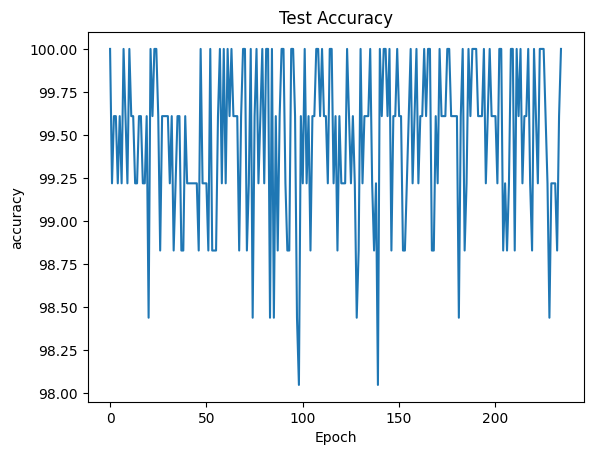

In [33]:
plt.plot(accuracy_logger)
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("Test Accuracy")